In [39]:
using CairoMakie
using Distributions
using LaTeXStrings   # For LaTeX-style legends
using Colors

colors = distinguishable_colors(1, [RGB(1, 1, 1), RGB(0, 0, 0)], dropseed=true)
# Function to calculate Beta distribution and confidence interval
function define_beta_distribution(c, k, prior)
    # Parameters for Beta distribution
    alpha = c / 2 + prior
    beta = c + k * prior - alpha

    # Compute 95% confidence interval width
    beta_dist = Beta(alpha, beta)
    ci_width = quantile(beta_dist, 0.975) - quantile(beta_dist, 0.025)
    ci_rel_width = ci_width / mean(beta_dist)

    return (beta_dist, ci_width, ci_rel_width)
end

# Function to create a plot for a specific configuration
function plot_configuration(k, prior, c_values, fig_title)
    fig = Figure()
    ax = Axis(fig[1, 1], title=fig_title, xlabel=L"\theta_i", ylabel=L"P(\theta_i) = \text{Beta}( \alpha_i, \alpha_0 - \alpha_i)")

    n_vals = length(c_values)
    for (i, c) in enumerate(c_values)
        beta_dist, ci_width, ci_rel_width = define_beta_distribution(c, k, prior)
        color = RGB(clamp(red(colors[1]) * i/n_vals, 0.0, 1.0),
                    clamp(green(colors[1]) * i/n_vals, 0.0, 1.0),
                    clamp(blue(colors[1]) *i/n_vals, 0.0, 1.0))

        println("c = $c, k = $k, prior = $prior")
        println("95CI-width: $ci_width")
        println("rel width: $ci_rel_width")

        x = 0:0.001:1
        lines!(ax, x, pdf(beta_dist, x), label="c = $c")
    end

    axislegend(ax)
    display(fig)
end



plot_configuration (generic function with 1 method)

c = 1, k = 5, prior = 1
95CI-width: 0.6061136346328393
rel width: 2.424454538531357
c = 10, k = 5, prior = 1
95CI-width: 0.4720087994018906
rel width: 1.1800219985047264
c = 100, k = 5, prior = 1
95CI-width: 0.18990084611451696
rel width: 0.3909723302357702
c = 500, k = 5, prior = 1
95CI-width: 0.08709302844441807
rel width: 0.17522700942004432


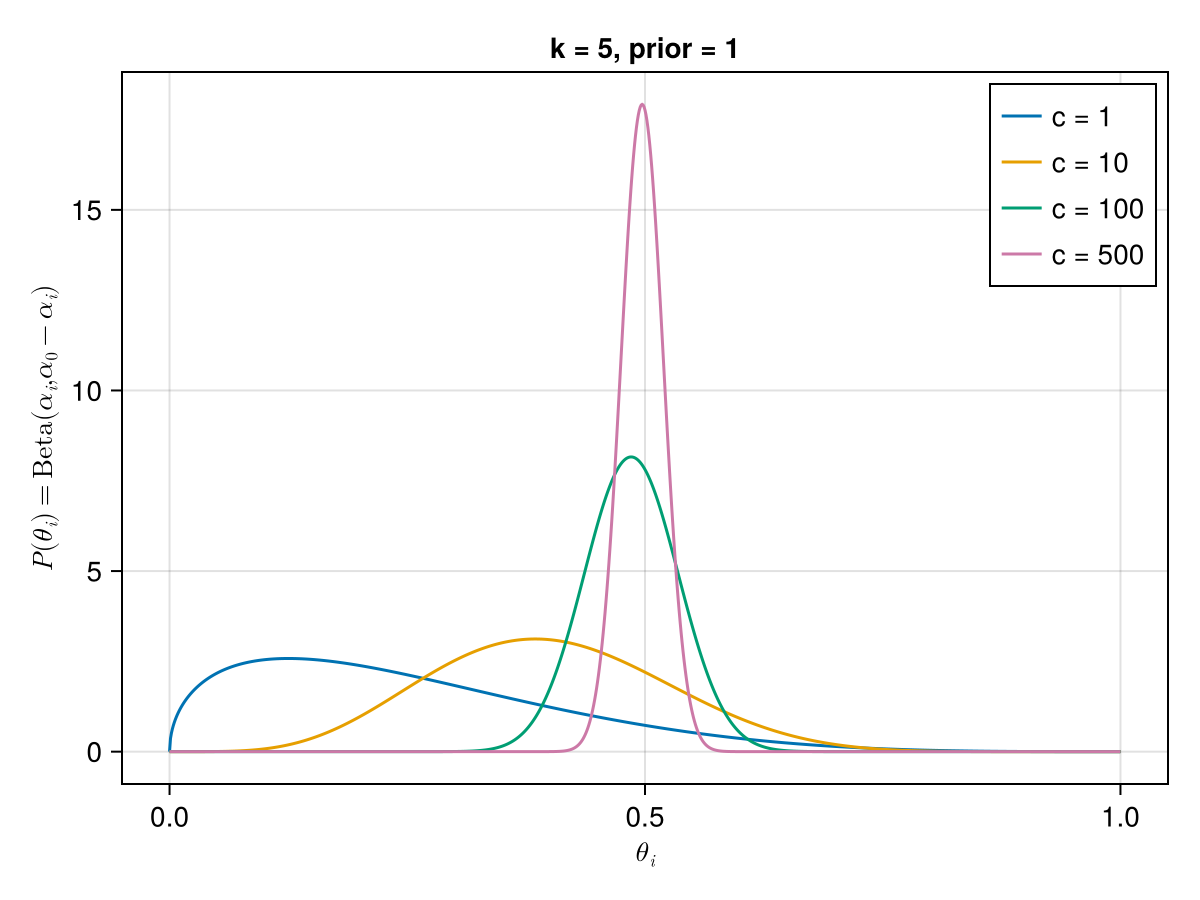

CairoMakie.Screen{IMAGE}


In [41]:
k = 5
prior = 1
c_values = [1, 10, 100, 500]
plot_configuration(k, prior, c_values, "k = $k, prior = $prior")

c = 10, k = 1500, prior = 1
95CI-width: 0.006254890868004243
rel width: 1.5741475351144012
c = 100, k = 1500, prior = 1
95CI-width: 0.017180753716784215
rel width: 0.5390040381736224
c = 1000, k = 1500, prior = 1
95CI-width: 0.03137153654678032
rel width: 0.156544593546808
c = 10000, k = 1500, prior = 1
95CI-width: 0.018119907053107565
rel width: 0.04166745273160108
c = 50000, k = 1500, prior = 1
95CI-width: 0.008632859697854156
rel width: 0.017782979658393226
c = 500000, k = 1500, prior = 1
95CI-width: 0.002767643001306608
rel width: 0.005551869653142443


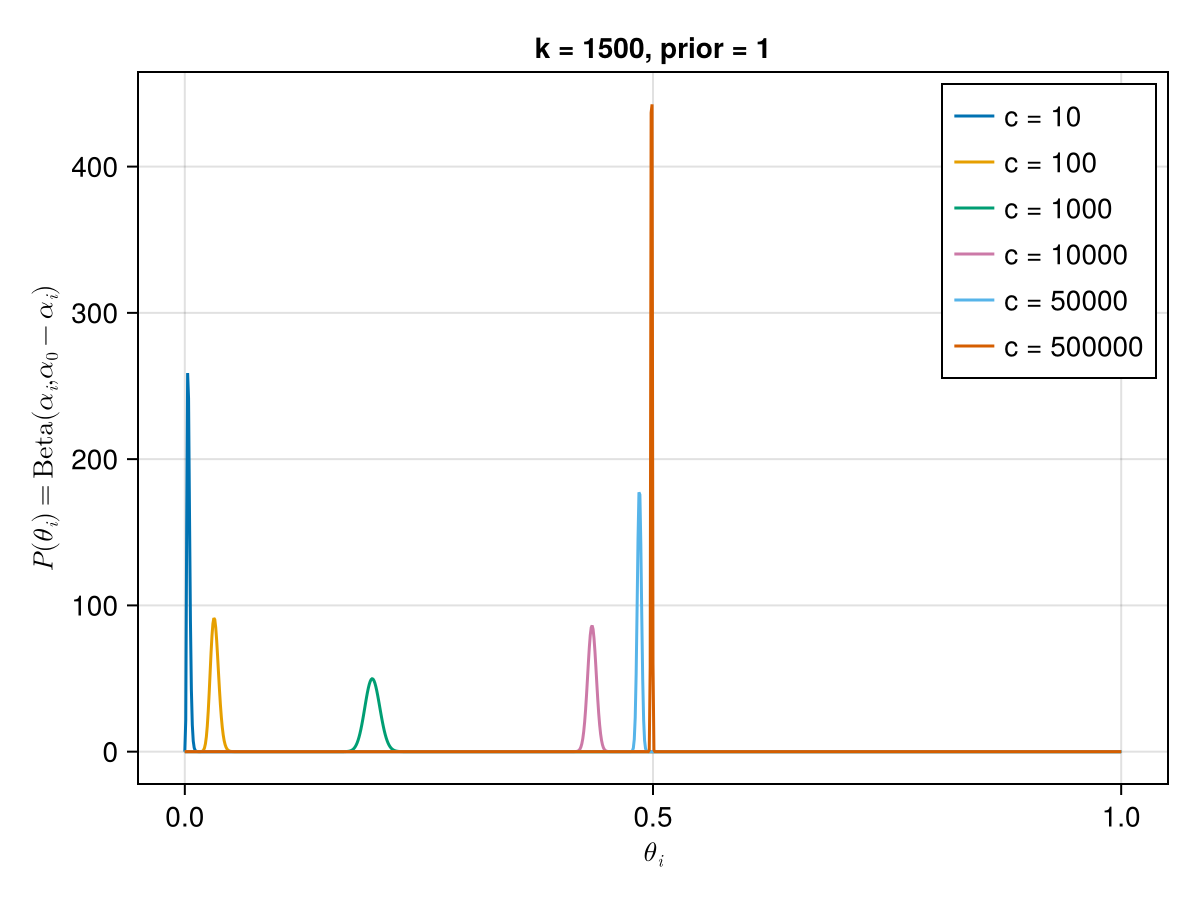

CairoMakie.Screen{IMAGE}


In [42]:

k = 1500
prior = 1
c_values = [10, 100, 1000, 10000, 50000, 500000]
plot_configuration(k, prior, c_values, "k = $k, prior = $prior")

c = 1, k = 1500, prior = 0.0033333333333333335
95CI-width: 0.3804477364151402
rel width: 4.535138579783128
c = 10, k = 1500, prior = 0.0033333333333333335
95CI-width: 0.45351570878225334
rel width: 1.3596406992139507
c = 50, k = 1500, prior = 0.0033333333333333335
95CI-width: 0.2597779621978155
rel width: 0.5714353254584663
c = 100, k = 1500, prior = 0.0033333333333333335
95CI-width: 0.18976255753768034
rel width: 0.39847480584207257
c = 500, k = 1500, prior = 0.0033333333333333335
95CI-width: 0.08709030385050631
rel width: 0.17592006817711373
c = 1000, k = 1500, prior = 0.0033333333333333335
95CI-width: 0.061780670117009884
rel width: 0.12417831907972934


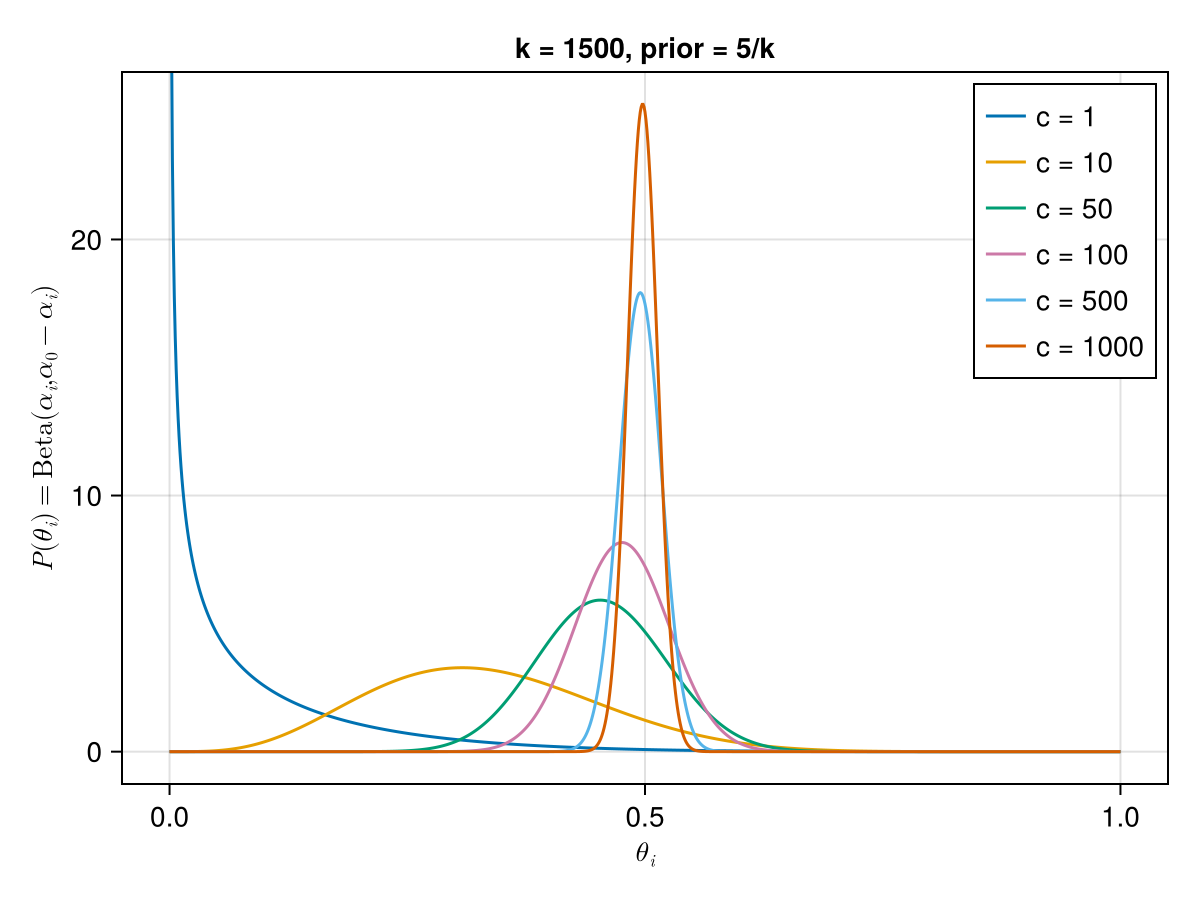

CairoMakie.Screen{IMAGE}


In [43]:

k = 1500
prior = 5 / k
c_values = [1, 10, 50, 100, 500, 1000]
plot_configuration(k, prior, c_values, "k = $k, prior = 5/k")